<details>
   <summary>Metadata</summary>
    title: "E-TRAINEE Time series analysis of 3D point clouds"
    description: "This is the fourth theme within the 3D/4D Geographic Point Cloud Time Series Analysis module."
    dateCreated: 2022-01-12
    authors: Katharina Anders and Bernhard Höfle
    contributors: 
    estimatedTime: 1.5 hours
</details>

# Time series analysis of 3D point clouds

Surface dynamics within a local landscape occur on a large range of spatiotemporal scales. The analysis of surface activities and structural dynamics in 4D point cloud data has therefore become an integral part of Earth observation. These special datasets contain detailed 3D information of the topography with time as additional dimension. 

The objective of this theme is to learn about
* <a href="#acquisition-of-3d-time-series">Acquisition of 3D time series</a>
* <a href="#spatiotemporal-information-in-4d-point-clouds">Spatiotemporal information in 4D point clouds</a>
* <a href="#processing-time-series-of-3d-point-clouds">Processing time series of 3D point clouds</a>
* <a href="#time-series-based-methods-of-change-analysis">Time series-based methods of change analysis</a>
    * <a href="#hands-on-3d-time-series-analysis">Hands-on 3D time series analysis</a>
    * <a href="#time-series-clustering">Time series clustering</a>
    * <a href="#4d-objects-by-change">4D objects-by-change</a>
   
After finishing this theme you will be able to:
* understand the difference between multitemporal point clouds and 4D point clouds in their information content
* derive change information from the temporal domain of 4D point clouds
* analyze 4D point clouds with automatic workflows in Python using open-source tools

<a id='acquisition-of-3d-time-series'></a>
## Acquisition of 3D time series

Essentially, 4D point clouds are time series of topographic data with a dense temporal dimension, beyond a "handful" of multitemporal acquisitions. This means, the time domain represents the behavior of the surface and process characteristics, opposed to multitemporal 3D point clouds which contain mostly pre- and post-states of changes with fewer (typically less than 100) epochs.
There is no fixed definition about the temporal density or length of 3D time series. Capturing surface processes near-continuously rather depends on the relation of acquisition frequency to the change rates of observed phenomena in a scene. 

The [main strategies of near-continuous 3D acquisition](../01_pointcloud_principles/01_pointcloud_principles.md#point-cloud-acquisition) are permanent terrestrial laser scanning (TLS) and time-lapse photogrammetry. A fixed installation of sensors enables to repeat the acquisition at very high frequency, even seconds to minutes (<a href="#references">Eitel et al., 2016</a>). The temporal interval depends on the requirements of the application, and is therefore typically defined by an analyst, but also limited by the sensor capabilities. As the sensors are programmed for automatic acquisition, they can be left alone for continued observation and generate time series of several weeks, months, and years.


An **example for permanent TLS** is the [CoastScan project](https://coastscan.citg.tudelft.nl/), which operates multiple permanent TLS stations for capturing dynamic surface processes in beach environments. Sandy beaches are highly dynamic areas undergoing continuous change. To observe different processes, like erosion during storms, formation and movement of sand bars, aeolian sand transport and effects of human interventions, topographic data at high spatial and temporal resolution is required. For this, a TLS was installed in a fixed position at three locations at the Dutch and Belgian coast. One of these locations is the beach at Kijkduin, The Netherlands, where hourly point clouds were acquired for six months, resulting in over 4,000 consecutive scans of the beach scene (<a href="#references">Vos et al., 2022</a>). The permanent TLS monitoring at Kijkduin is a [case study in this course](../../data_usecases/usecase_beach_kijkduin.md).

<center>
<img src="media/m3_theme4_pls_kijkduin.png" alt="pls_kijkduin" title="Permanent laser scanning observation at Kijkduin Beach" width="800">

<i>Permanent laser scanning of a sandy beach at Kijkduin, The Netherlands, to capture dynamic sand transport, which can be assessed as bitemporal surface change maps or time series at each location from the hourly data. Figure by K. Anders, following [Anders et al. (2019)](https://doi.org/10.5194/isprs-annals-IV-2-W5-317-2019).</i>
</center>

An **example for time-lapse photogrammetry** is monitoring of rockfalls as performed by <a href="#references">Blanch et al. (2021)</a> at a rock face in north-east Spain. The observation of rockfall activity is highly relevant in the context of natural hazards, and spatiotemporal analysis of rockfall processes can provide new insights into, e.g. prefailure deformation, which is an important factor for the development of early warning systems (see also monitoring studies by <a href="#references">Kromer et al., 2017</a> or <a href="#references">Williams et al., 2018</a>). In the observation system by <a href="#references">Blanch et al. (2021)</a>, five cameras were installed in a fixed position with view of the rock face. Images were captured three times per day over a period of around two years. By recosntructing 3D point clouds for each epoch, individual rockfall events can then be detected throughout the observation period, e.g., using direct point cloud comparison.

<center>
<img src="media/m3_theme4_timelapse_blanch.png" alt="timelapse_blanch" title="Time-lapse photogrammetry of rockfalls" width="800">

<i>Time-lapse photogrammetry of rockfalls in Catalonia, north-east Spain, from five camera locations captures rockfall events at an interval of three times per day. Individual rockfall events can be derived from bitemporal point coud comparison. Figure modified from <a href="http://hdl.handle.net/10803/675397">Blanch (2022)</a> / [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1) and <a href="http://dx.doi.org/10.3390/rs13081460">Blanch et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

<a id='spatiotemporal-information-in-4d-point-clouds'></a>
## Spatiotemporal information in 4D point clouds

The example of rockfall monitoring demonstrates the benefit of high-frequency and long-term acquisitions. If the acquisition frequency were lower, multiple rockfall events may occur in the same area of the rock cliff in the meantime (<a href="#references">Williams et al., 2018</a>). Such coinciding events cannot be identified individually, if no acquisitions in-between the events are available. Using 4D point clouds, i.e. near-continuous observation, we can resolve single events and thereby also describe the spatiotemporal rockfall characteristics. For example, it can be observed how rockfall events coalesce and result in larger rockfall areas on a cliff. <a href="#references">Williams et al. (2019)</a> have used 4D point clouds acquired by hourly TLS at a coastal cliff to investigate the magnitude-frequency distribution of rockfall events. Only from the high-frequency data, it was possible to identify a large number of small - but more frequent - rockfalls. In sum, these small events make a large contribution to overall mass loss at the cliff and are therefore important to capture for gaining insight on underlying processes and drivers.

<center>
<img src="media/m3_theme4_rockfall_williams.png" alt="rockfalls_williams" title="Rockfall events captured by hourly PLS" width="800">

<i>Coinciding rockfall events captured by hourly point clouds, which would be aggregated in change analysis using longer timespans. The spatial delineation of single events is colored by timing (see colorbar of observation period). Figure modified from <a href="https://doi.org/10.1029/2019JF005225">Williams et al. (2019)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

The rockfall example shows the importance to **resolve single events**, here of erosion. In other settings, we may face the situation that even different types of processes act on the surface with overlap. For the example of an active rock glacier (which is a [case study in this course](../../data_usecases/usecase_rockglacier_ahk.md)), annual point clouds show enormous changes of the surface, but are not sufficient to attribute the observe change to the underlying processes. The rock glacier experiences overall creep (i.e. forward movement of the entire object), including deformation of the rock glacier body, heave and subsidence due to thawing, as well as individual boulder movement of the massive rocks composing the phenomenon.

<center>
<img src="media/m3_theme4_rockglacier_ulrich.png" alt="rockglacier_ulrich" title="Rock glacier changes at different observation timespans" width="800">

<i>Changes at an active rock glacier derived for a one-year timespan (left) and schematic profile of possible rock glacier changes in a three-week and one-year timespan (right). Changes in the profile visualize how specific change types can only be separated at shorter timespans. For example, boulder movement can be identified in the three-week timespan, because change due to creep-related movement is lower than the associated level of detection. Figure modified from <a href="https://doi.org/10.5194/esurf-9-19-2021">Ulrich et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

So one major advantage of dense temporal information is that it allows to **disaggregate process types** in space and time. When the time series information is near-continuous, it further allows as do **describe the spatiotemporal properties of the observed process**. Think of the example of the beach above: from bitemporal changes we can interpret that a sand bar formed within a timespan of several weeks, but the much denser (hourly) time series describes the change rate of formation, maybe even several stages of formation, the timing of highest magnitude, and when the sand bar disappeared again.

<center>
<img src="media/m3_theme4_sandbar.png" alt="sandbar" title="Change representation of a sandbar as change map and time series" width="600">

<i>Surface changes on the beach represented as bitemporal change map for a three-week timespan (left) and as time series of one location on a sandbar (right). The combination of spatial and temporal information allows identification and description of a specific process type from the 3D time series. Figure by K. Anders, following [Anders et al. (2019)](https://doi.org/10.5194/isprs-annals-IV-2-W5-317-2019).</i>
</center>

Beyond the increased information content for change representation, spatiotemporal information in 4D point clouds can even support change analysis itself. Why and how this can be done, will be introduced in a later section on <a href="#time-series-based-methods-of-change-analysis">time series-based methods of change analysis</a>. Subsequently, we will first have a look at processing requirements of laser scanning time series, as opposed to few multitemporal 3D point clouds.

<a id='processing-time-series-of-3d-point-clouds'></a>
## Processing time series of 3D point clouds

As you already know for change analysis of point clouds in general, there are different factors influencing the accuracy of single epochs and the uncertainty associated to derived change (cf. [contents of Theme 3](../03_3d_change_analysis/03_3d_change_analysis.ipynb#uncertainty-in-change-analysis)). Of course these influences are also present in case of near-continuous point cloud acquisitions. We are even facing a special situation now, because some influences may even become more pronounced - or more visible - in the analysis.

Regarding the influence of surface characteristics (e.g., moisture) and atmospheric conditions (i.e., temperature, air pressure, humidity), it has been noted especially in high-frequency LiDAR time series that their is a direct link to temporal variations in measurements. For hourly laser scans of a sandy beach, the following plot shows the variation in height measurements at a paved, assumingly stable location:

<center>
<img src="media/m3_theme4_kijkduin_measurement_variation.png" alt="measurement_variation" title="Measurement variation at stable area in Kijkduin" width="800">

<i>Elevation differences at a stable location (paved area) in a sandy beach scene acquired by hourly terrestrial laser scanning compared to daily air temperature measured at a nearby regional station. Figure modified from <a href="https://doi.org/10.5194/isprs-annals-IV-2-W5-317-2019">Anders et al. (2019)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

In this PLS setting, elevation differences are in a range of 5 cm, with peaks at 10 cm. A direct link to atmospheric conditions can be established when comparing to air temperature records from a regional meteorological station. It needs to be noted, that this strong influence is not necessarily caused only by the influence of atmospheric conditions on the refraction of the LiDAR beam (cf. <a href="#references">Friedli et al, 2019</a>). Another aspect we need to consider is the stability of the 'fixed' instrument itself. Depending on the installation, there may be material deformations linked to changing temperatures, which influence the orientation of the sensor and would have similar effects on the range measurement (<a href="#references">Anders al., 2019</a>). By now, detailed experiments and investigations have been conducted with high-frequency, permanent TLS to further understand environmental influences and the stability of laser scanning time series (e.g., <a href="#references">Kuschnerus et al., 2021; Voordendag et al., 2023</a>). Thereby, a lot has also been learnt to improve their setup and efforts are being made to reduce external influences to the level known by standard, multitemporal surveys. Systematic effects that remain, e.g. misalignments, can be reduced through standard approaches, such as [rigid transformation](../01_pointcloud_principles/01_pointcloud_principles.md#transformation-of-3d-point-cloud-data) using fixed reference objects or surfaces (cf. [section on alignment in previous theme](../03_3d_change_analysis/03_3d_change_analysis.ipynb)).

While effects in the measurement stability and uncertainties are more visible in near-continuous 3D data, and thereby more influencing for near-continuous change analysis, we can draw one advantage from these special data: The **temporally dense acquisition can be used to leviate the effect of uncertainties** through the dense spatiotemporal information at hand. Such a _4D filtering strategy_ has been developed by <a href="#references">Kromer et al. (2015)</a>, with the concept of leveraging point redundancy in space and time to reduce noise and being able to detect smaller-scale changes confidently.

<center>
<img src="media/m3_theme1_kromer_etal_2015_edt.png" alt="4d_filter" title="4D filtering approach" width="750">

<i>Combination of spatial neighbors (left) and temporal neighbors (middle) for 4D filtering. Within the spatiotemporal neighborhood of each point in each epoch, the median values are computed, corresponding to a sliding temporal window (right). Figure modified from <a href="https://doi.org/10.3390/rs71013029">Kromer et al. (2015)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>

The method is demonstrated to strongly reduce outliers and to increase the level of detection in change analysis by using the spatiotemporal average, if the sampling in space and time is dense enough. So if we have high point redundancy as in 4D point clouds, we can use this to reduce the overall uncertainty of our change analysis. Have a look at the paper by <a href="#references">Kromer et al. (2015)</a> to learn about this concept in more detail.

The 4D filtering method by <a href="#references">Kromer et al. (2015)</a> performs averaging in space and time simultaneously. In other studies, these steps have sometimes been separated into first spatial and secondly temporal averaging or filtering. For example, spatial smoothing may already be introduced by deriving digital elevation models (DEMs), in the process of rasterizing point clouds. Thereafter, averaging of change values in [DEMs of difference](../03_3d_change_analysis/03_3d_change_analysis.ipynb#surface-change-analysis) along the 1D time series in each raster cell yields temporal smoothing to achieve further reduction of noise. This approach is used by <a href="#references">Eltner et al. (2017)</a> for the analysis of soil surface changes acquired by time-lapse photogrammetry. The concept of additional temporal smoothing can also be applied to 3D time series of surface changes (rather than solely rasterized topographic changes). For example, time series of M3C2 distances <a href="#references">Lague et al. (2013)</a> at core point locations [cf. introduction of the method in previous theme](../03_3d_change_analysis/03_3d_change_analysis.ipynb#surface-change-analysis) can be used to apply, e.g., median filtering to derived 3D changes (e.g., <a href="#references">Anders et al., 2021</a>). With the M3C2, spatial smoothing has already been introduced in the step of point cloud distance computation, where points are averaged in the 3D neighborhood around each core point. Beyond this, advanced time series filtering methods have been proposed to further reduce uncertainties through full incorporation of the temporal domain (e.g., <a href="#references">Winiwarter et al., 2022</a>). These will not be introduced in more detail here.

<a id='time-series-based-methods-of-change-analysis'></a>
## Time series-based methods of change analysis 
As laid out above, the information content in 4D point clouds holds potential to gain deeper insight into observed surface processes. Incorporating the time series information already in the analysis process, can overcome some important drawbacks of pairwise change analysis (as introduced in [Theme 3](../03_3d_change_analysis/03_3d_change_analysis.ipynb)).

In situations where surface processes occur during overlapping timespans and also with spatial overlap, **surface change information from two epochs is ambiguous** and cannot necessarily be distinguished into single change types. The figure below visualizes schematically how individual erosion, deposition, or transport processes cannot necessarily be separated. If deposition coincides with overall surface increase, the spatial extent of the deposition form cannot be identified by some boundary in the change values. 


<center>
<img src="media/m3_theme4_and2020_edt.png" alt="ambig_pairwise_change" title="Ambiguity in pairwise change information" width="750">

<i>Pairwise observation of change types ‘accumulation’, ‘erosion’, and ‘transport’. The processes that underlie single values of local surface height change
are ambiguous. Figure by K. Anders, following <a href="https://doi.org/10.1016/j.isprsjprs.2019.11.025">Anders et al. (2020)</a>.</i>
</center>

For example, the erosion and transport path of an avalanche would be aggregated into overall snow cover decrease, such as compaction or melting of the snow cover, if both occurred during the timespan of analyzed epochs. At the same time, the extent and magnitude of avalanche deposition may be underestimated if the process coincides with overall erosion of the surrounding surface. This example is visualized here with bitemporal change information of a three-day timespan:

<center>
<img src="media/m3_theme4_and2022_edt.png" alt="bitemporal_snowcover" title="Bitemporal snow cover changes" width="500">

<i>Bitemporal point cloud distances of snow-covered scene acquired by terrestrial laser scanning (TLS) within a three-day timespan, where avalanche erosion and deposition forms overlap with overall decrease of the snow cover. Figure by K. Anders, following <a href="https://doi.org/10.1109/LGRS.2022.3148920">Anders et al. (2022)</a>.</i>
</center>

To overcome limitations of bitemporal analysis in such cases, and to further leverage the temporal domain contained in 4D point clouds, time series-based methods are increasingly developed. In the following, we will look at two different methods of time series-based analysis of 4D point clouds with <a href="#time-series-clustering">time series clustering</a> and the <a href="#4d-objects-by-change">extraction of 4D objects-by-change</a>. For this, we will use a **hands-on analysis example**  to learn how time series-based analysis can be performed. 

<a id='hands-on-3d-time-series-analysis'></a>
### Hands-on 3D time series analysis 

As example data, we are using a time series of TLS-based snow cover monitoring acquired at the Zugspitze, Germany (see visualization of example change scene above). The data are openly available on the PANGAEA data repository (<a href="#references">Anders et al., 2022</a>). Here, we provide a subset of the data to reduce the volume, which you can download with the exercise data from the central course repository (data directory `schneeferner`). The data covers a smaller area of interest in the scene, namely part of the snow-covered slope, and is subsampled to a point spacing of 50 cm. The hourly point clouds cover 107 epochs acquired in April 2019.
For the analysis, we will use the [open source Python library](https://github.com/3dgeo-heidelberg/py4dgeo) `py4dgeo`. The package is contained in the Python environment of this course, or can be installed via pip - see the documentation for further information on installation and basic usage: https://py4dgeo.readthedocs.io/en/latest/index.html. 

First, we start by setting up the Python environment and data:

In [1]:
# import required modules
import os
import numpy as np
import py4dgeo
from datetime import datetime

# specify the data path
data_path = 'path-to-data'

# check if the specified path exists
if not os.path.isdir(data_path):
    print(f'ERROR: {data_path} does not exist')
    print('Please specify the correct path to the data directory by replacing <path-to-data> above.')

# sub-directory containing the point clouds
pc_dir = os.path.join(data_path, 'pointclouds')

# list of point clouds (time series)
pc_list = os.listdir(pc_dir)
pc_list[:5] # print the first elements

['schneeferner_180418_120027.laz',
 'schneeferner_180418_130027.laz',
 'schneeferner_180418_140027.laz',
 'schneeferner_180418_150027.laz',
 'schneeferner_180418_160023.laz']

In the list of point cloud files you can see that we have one laz file per epoch available. The file name contains the timestamp of the epoch, respectively, in format `YYMMDD_hhmmss`. To use this information for our analysis, we read the timestamp information from the file names into `datetime` objects.

In [2]:
# read the timestamps from file names
timestamps = []
for f in pc_list:
    if not f.endswith('.laz'):
        continue

    # get the timestamp from the file name
    timestamp_str = '_'.join(f.split('.')[0].split('_')[1:]) # yields YYMMDD_hhmmss

    # convert string to datetime object
    timestamp = datetime.strptime(timestamp_str, '%y%m%d_%H%M%S')
    timestamps.append(timestamp)

timestamps[:5]

[datetime.datetime(2018, 4, 18, 12, 0, 27),
 datetime.datetime(2018, 4, 18, 13, 0, 27),
 datetime.datetime(2018, 4, 18, 14, 0, 27),
 datetime.datetime(2018, 4, 18, 15, 0, 27),
 datetime.datetime(2018, 4, 18, 16, 0, 23)]

Now we use the point cloud files and timestamp information to create a `SpatiotemporalAnalysis` object, which is the **main data structure for 3D time series in `py4dgeo`**. The data object is backed by an archive file (zip), which needs to be specified when instantiating the object:

In [3]:
analysis = py4dgeo.SpatiotemporalAnalysis(f'{data_path}/schneeferner.zip', force=True)

[2023-03-29 15:15:19][INFO] Creating analysis file I:/etrainee_data/schneeferner/schneeferner.zip


The concept of the py4dgeo `SpatiotemporalAnalysis` object is to add a time series of 3D point clouds in terms of their change values to one global reference epoch. These change values are derived for a set of core points using the M3C2 algorithm, which was introduced in py4dgeo in the [previous theme](../03_3d_change_analysis/03_3d_change_analysis.ipynb). With each epoch added as M3C2 distances compared to the reference epoch, we also add the timestamp to be usable in time series analysis.

As reference epoch, we use the first epoch in our time series (i.e., list of point clouds):

In [4]:
# specify the reference epoch
reference_epoch_file = os.path.join(pc_dir, pc_list[0])

# read the reference epoch and set the timestamp
reference_epoch = py4dgeo.read_from_las(reference_epoch_file)
reference_epoch.timestamp = timestamps[0]

# set the reference epoch in the spatiotemporal analysis object
analysis.reference_epoch = reference_epoch

[2023-03-29 15:15:19][INFO] Reading point cloud from file 'I:/etrainee_data/schneeferner\pointclouds\schneeferner_180418_120027.laz'
[2023-03-29 15:15:19][INFO] Building KDTree structure with leaf parameter 10
[2023-03-29 15:15:19][INFO] Saving epoch to file 'C:\Users\k53\AppData\Local\Temp\tmpohrn6dlg\reference_epoch.zip'


For epochs to be added, we now configure the M3C2 algorithm to derive the change values. The registration error is used from <a href="#references">Anders et al. (2022)</a>, where the average alignment accuracy of point clouds in the time series is assessed at 2.5 cm.

In [5]:
# specify corepoints, here all points of the reference epoch
analysis.corepoints = reference_epoch.cloud[::]

# specify M3C2 parameters
analysis.m3c2 = py4dgeo.M3C2(cyl_radii=(1.0,), normal_radii=(1.0,), max_distance=10.0, registration_error = 0.025)

[2023-03-29 15:15:20][INFO] Initializing Epoch object from given point cloud
[2023-03-29 15:15:20][INFO] Building KDTree structure with leaf parameter 10
[2023-03-29 15:15:20][INFO] Saving epoch to file 'C:\Users\k53\AppData\Local\Temp\tmplexs_dnn\corepoints.zip'


Now we add all the other epochs with their timestamps. Note that we do not add every single epoch using the `add_epochs()` method, but compile a list of all epochs (limited only by available RAM). Adding them as entire batches saves a lot of processing time, as the analysis object needs to be re-configured in memory for each adding operation.

In [ ]:
# create a list to collect epoch objects
epochs = []
for e, pc_file in enumerate(pc_list[1:]):
    epoch_file = os.path.join(pc_dir, pc_file)
    epoch = py4dgeo.read_from_las(epoch_file)
    epoch.timestamp = timestamps[e]
    epochs.append(epoch)

# add epoch objects to the spatiotemporal analysis object
analysis.add_epochs(*epochs)

Now we have a **fully constructed spatiotemporal object**, which contains the change values in the scene at each epoch, and the time series of surface changes at each core point location, along with all metadata.

In [7]:
# print the spatiotemporal analysis data for 3 corepoints and 5 epochs, respectively
print(f"Space-time distance array:\n{analysis.distances[:3,:5]}")
print(f"Uncertainties of M3C2 distance calculation:\n{analysis.uncertainties['lodetection'][:3, :5]}")
print(f"Timestamp deltas of analysis:\n{analysis.timedeltas[:5]}")

Space-time distance array:
[[-0.00090916 -0.0092291  -0.00523798  0.00357471 -0.01300597]
 [ 0.00472494 -0.00633247 -0.00151809  0.00078728 -0.01732864]
 [ 0.0026491  -0.01452403 -0.00742233 -0.00195866 -0.02317615]]
Uncertainties of M3C2 distance calculation:
[[0.05939054 0.05760474 0.06653623 0.05911205 0.06040037]
 [0.06383101 0.06259084 0.06683246 0.06625019 0.06283139]
 [0.06452989 0.06335329 0.06382436 0.06584868 0.06144326]]
Timestamp deltas of analysis:
[datetime.timedelta(0), datetime.timedelta(seconds=3600), datetime.timedelta(seconds=7200), datetime.timedelta(seconds=10800), datetime.timedelta(seconds=14396)]


We use these elements to **visualize the changes in the scene** for a selected epoch, together with the time series of surface changes at a selected location. The location here was selected separately in CloudCompare (as the corepoint id). You may select your own location coordinates or, in general, use external measurements, e.g., from GNSS, to look into a location of interest.

[2023-03-29 15:16:10][INFO] Restoring epoch from file 'C:\Users\k53\AppData\Local\Temp\tmp603_y6md\reference_epoch.zip'


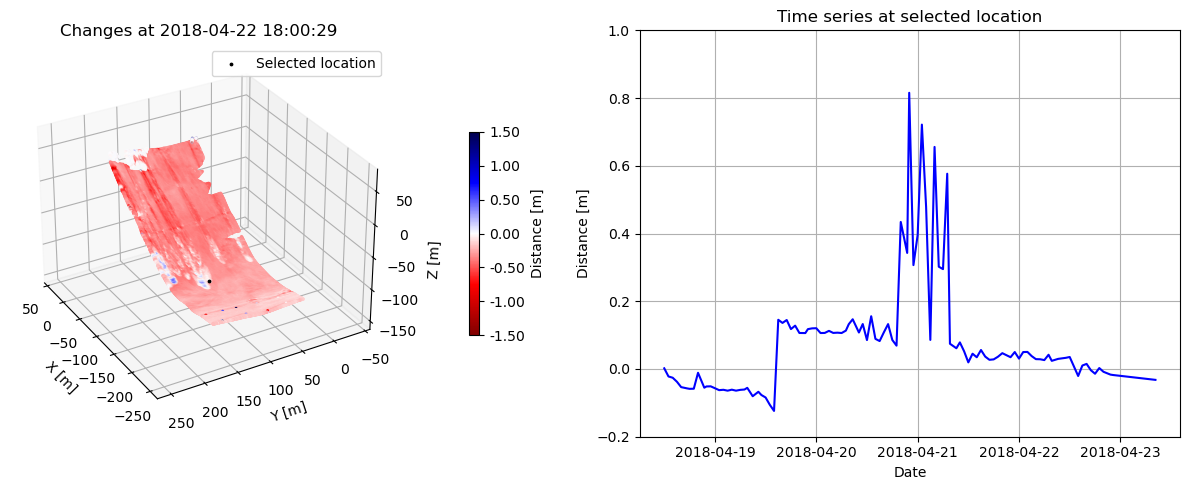

In [8]:
# import plotting module
import matplotlib.pyplot as plt

# allow interactive rotation in notebook
%matplotlib inline

# create the figure
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,2,1,projection='3d',computed_zorder=False)
ax2=fig.add_subplot(1,2,2)

# get the corepoints
corepoints = analysis.corepoints.cloud

# get change values of last epoch for all corepoints
distances = analysis.distances
distances_epoch = [d[100] for d in distances]

# get the time series of changes at a specific core point locations
cp_idx_sel = 62000
coord_sel = analysis.corepoints.cloud[cp_idx_sel]
timeseries_sel = distances[cp_idx_sel]

# get the list of timestamps from the reference epoch timestamp and timedeltas
timestamps = [t + analysis.reference_epoch.timestamp for t in analysis.timedeltas]

# plot the scene
d = ax1.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=distances_epoch[:], cmap='seismic_r', vmin=-1.5, vmax=1.5, s=1, zorder=1) 
plt.colorbar(d, format=('%.2f'), label='Distance [m]', ax=ax1, shrink=.5, pad=.15)

# add the location of the selected coordinate
ax1.scatter(coord_sel[0], coord_sel[1], coord_sel[2], c='black', s=3, zorder=2, label='Selected location')
ax1.legend()

ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.set_zlabel('Z [m]')
ax1.set_aspect('equal')
ax1.view_init(elev=30., azim=150.)
ax1.set_title('Changes at %s' % (analysis.reference_epoch.timestamp+analysis.timedeltas[100]))

# plot the time series
ax2.plot(timestamps, timeseries_sel, color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Distance [m]')
ax2.grid()
ax2.set_ylim(-0.2,1.0)
ax2.set_title('Time series at selected location')

plt.tight_layout()
plt.show()

In the changes on the snow-covered slope, we can see overall negative surface change, i.e. snow cover decrease. The linear structures of negative distances can be interpreted as avalanche erosion paths, with corresponding deposition areas at their bottom. The selected location of the plotted time series is located in such an avalanche deposition. Here, we can now derive the timing of the avalanche, which we expect as sudden increase in local snow cover. This happens on the afternoon of 2018-04-19. After the deposition event, the time series shows a continued trend of surface (snow cover) decrease, here related to warming temperatures in April.

What you will have immediately noted are the strong jumps in distance increase and decrease in the night of 2018-04-20 to 2018-04-21. Due to published analysis of the data (cf. <a href="#references">Anders et al., 2022</a>), we know that this part of the time series are point clouds which are of poor quality and not well aligned, and therefore cause strong artifacts in the change analysis. 
The raw time series values we are currently using further show some fluctuation around the overall trend. These are likely related to noise, i.e. we cannot confidently assume that they are actual small changes. Therefore, we will now apply **temporal smoothing** to the data.

As you learnt above, there are different approaches to <a href="#processing-time-series-of-3d-point-clouds">spatiotemporal filtering</a>. In our case, we already introduced spatial smoothing by applying the M3C2 to the point cloud epochs. We are therefore now using only time series averaging, to further filter the data in the temporal domain. We use a **rolling median with a defined temporal window**, here of six epochs. For this, we use the `temporal_averaging()` function in py4dgeo.

In [9]:
analysis.smoothed_distances = py4dgeo.temporal_averaging(
    analysis.distances, smoothing_window=6
)

[2023-03-29 15:16:13][INFO] Starting: Smoothing temporal data


h:\conda_envs\etrainee\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


[2023-03-29 15:16:19][INFO] Finished in 6.4172s: Smoothing temporal data


Now we can compare the raw and smoothed time series at our selected location:

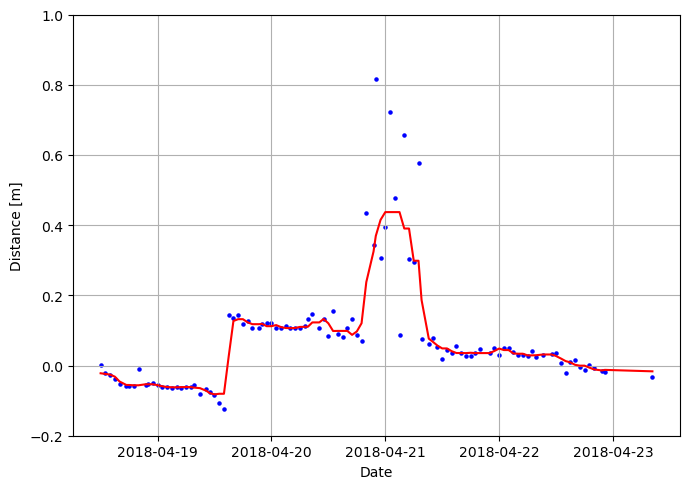

In [10]:
# create the figure
fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot the raw time series
ax.scatter(timestamps, timeseries_sel, color='blue', label='raw', s=5)

# plot the smoothed time series
timeseries_sel_smooth = analysis.smoothed_distances[cp_idx_sel]
ax.plot(timestamps, timeseries_sel_smooth, color='red', label='smooth')

ax.set_xlabel('Date')
ax.set_ylabel('Distance [m]')
ax.grid()
ax.set_ylim(-0.2,1.0)

plt.tight_layout()
plt.show()

So far, we have explored the 4D point cloud dataset by looking into bitemporal surface changes (M3C2 distances) in the scene at selected epochs, and by visualizing the time series at a selected location. Accordingly, the data structure of the `SpatiotemporalAnalysis` object facilitates access to the change information in 3D time series and provides an efficient way to store change analyses for many epochs.

With the subsequent section, we will now get started with analysis methods making use of the time series information, firstly <a href="#time-series-clustering">time series clustering</a> and secondly the <a href="#4d-objects-by-change">extraction of 4D objects-by-change</a>.

<a id='time-series-clustering'></a>
### Time series clustering

Clustering of 3D time series is an approach developed to derive groups of similar change patterns in a scene, presented by <a href="#references">Kuschnerus et al. (2021)</a>. As a method of **unsupervised learning**, it does not require to specify specific patterns or expected processes beforehand. This is ideal for near-continuous topographic observation, as we generally cannot know a priori about all possible types of surface activities occurring in the observed scene. 
The concept of time series clustering following <a href="#references">Kuschnerus et al. (2021)</a> is to **group time series of a scene which exhibit a similar evolution of the topography throughout time**. The objective is to separate the observed scene into distinct spatial regions where each region (cluster) represents a time series associated to a specific change pattern. This change pattern, ultimately, can be linked to characteristic surface processes shaping this region. The following figure visualizes how two time series in a scene can be similar according to their Euclidian distance (the lower, the more similar) or according to their correlation (between 0 and 1, with 1 being fully correlated):

<center>
<img src="media/m3_theme4_kuschnerus_clustering.png" alt="similarity_timeseries" title="Time series with different aspects of similarity" width="550">

<i>Example aspects how pairs of time series can be similar to one another according to Euclidian distance $d_E$ or correlation Cor. Figure by <a href="https://doi.org/10.5194/esurf-9-89-2021">Kuschnerus et al. (2021)</a> / [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).</i>
</center>
 
 Using such similarity metrics, different algorithms of clustering can be applied to perform time series grouping, with k-means, agglomerative clustering, and DBSCAN investigated by <a href="#references">Kuschnerus et al. (2021)</a> for an hourly PLS time series of a sandy beach. The principles and different methods of machine learning will be introduced in the [next theme](../05_pointcloud_machine_learning/05_pointcloud_machine_learning.ipynb). Here, we will focus on k-means clustering regarding Euclidian distances as one possible approach.

We hence perform **time series clustering** on our smoothed time series of snow cover changes, looking into potential change patterns that may become visible. Following <a href="#references">Kuschnerus et al. (2021)</a>, we apply a k-means clustering with a defined number of clusters, here 5.

In [11]:
# import kmeans clustering module from scikit-learn
from sklearn.cluster import KMeans

# use the smoothed distances for clustering
distances = analysis.smoothed_distances

# define the number of clusters
k=5

# create an array to store the labels
labels = np.full((distances.shape[0]), np.nan)

nan_indicator = np.logical_not(np.isnan(np.sum(distances, axis=1)))
kmeans = KMeans(n_clusters=k, random_state=0).fit(distances[nan_indicator, :])
labels[nan_indicator] = kmeans.labels_


h:\conda_envs\etrainee\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


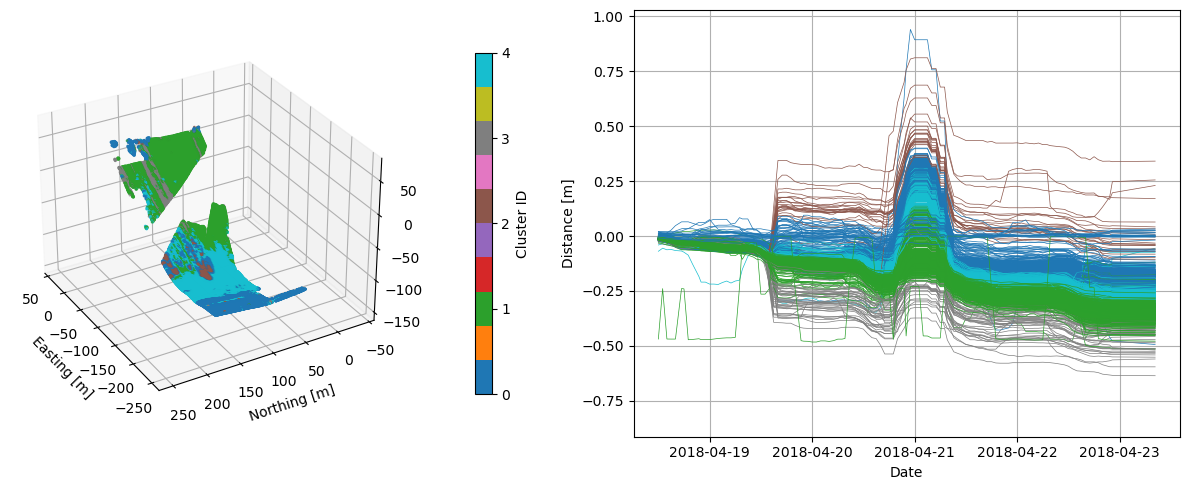

In [12]:
# create the figure
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(1,2,1,projection='3d',computed_zorder=False)
ax2=fig.add_subplot(1,2,2)

# set colormap for clustering
cmap_clustering = 'tab10'

# get the corepoints
corepoints = analysis.corepoints.cloud

# plot the scene colored by cluster labels
d = ax1.scatter(corepoints[:,0], corepoints[:,1], corepoints[:,2], c=labels, cmap=cmap_clustering, s=1)
ticks = np.arange(0, k, 1).astype(int)
cb = plt.colorbar(d, ticks=ticks, label='Cluster ID', ax=ax1, shrink=.8, pad=.15)

ax1.set_xlabel('Easting [m]')
ax1.set_ylabel('Northing [m]')
ax1.set_aspect('equal')
ax1.view_init(elev=30., azim=150.)

# plot the time series colored by cluster labels (with the same coloring as map)
import matplotlib as mpl
cmap_labels = labels / np.nanmax(labels)
cmap_clusters = mpl.cm.get_cmap(cmap_clustering)
labels_plotted = {}

# use only every 100th time series for plotting
for c in range(0,distances.shape[0],100):
    ts = distances[c]
    label_curr = labels[c]
    if not label_curr in labels_plotted.keys():
        labels_plotted[label_curr] = [c]
    p1 = ax2.plot(timestamps,ts,c=cmap_clusters(cmap_labels[c]), label=label_curr,linewidth=.5)
    
    labels_plotted[label_curr].append(c)

ax2.set_xlabel('Date')
ax2.set_ylabel('Distance [m]')
ax2.grid()

plt.tight_layout()
plt.show()

In the resulting plot, it becomes visible how different types of change are separated into clusters. Knowing the scene, we recognize the avalanche deposition area and erosion paths. The clustering further separates the upper and lower part of the slope, and the flat area at the bottom of the slope. In the time series (colored by the same labels), we can see that the overall trend of surface decrease behaves differently in these three parts (green to blue time series). These spatial clusters could now be used to further assess process characterstics in the scene. 
Of course, the visible **change patterns are dependent on the selected number of clusters `k`**. If you are working on this lesson in an interactive notebook, try adapting `k` to see how it influences your result.

Another important note on clustering, which becomes apparent from our result map: the metrics of determining the similarity of time series cannot handle gaps in the data (i.e. NoData values in the time series). For our dataset, these are present in large part of the scene in point clouds acquired during the night, as the TLS was moved to a protected, more occluded, position (cf. <a href="#references">Anders et al., 2022</a>). These gaps over multiple hours are not interpolated by our temporal averaging with a smaller window. Removing NoData values from single time series is no solution here, as the metrics can neither be derived for time series of unequal length (<a href="#references">Kuschnerus et al., 2021</a>). This aspect therefore needs to be accounted for during data preparation, for example, by introducing stronger spatial and/or temporal interpolation where possible. An alternative could also be to adapt the analysis approach, for example, assessing change patterns for temporal subsets of the time series or at lower temporal sampling, e.g., by selecting only one measurement per day, week, and so on.


<a id='4d-objects-by-change'></a>
### 4D objects-by-change

Another approach to time series-based change analysis is provided with the extraction of 4D objects-by-change (4D-OBCs). Whereas clustering is applied to the full time series at each location, the concept of 4D-OBCs is to identify individual surface activities in space and time, meaning with different timing and durations across a scene. Therein, each objects represents a surface activity which occurs during a specific timespan (identified in the time series at a a location) and with a certain spatial extent (given by time series similarity in the local neighborhood during their timespan of occurrence). Accordingly, the extraction of a 4D-OBC follows two main steps:

<center>
<img src="media/m3_theme4_4dobc_method.png" alt="4dobc_method" title="Steps of 4D-OBC extraction" width="800">

<i>Main steps for the extraction of a 4D object-by-change with detection of a surface activity in the time series and subsequent region growing regarding the similarity of neighboring time series. Figure by K. Anders, following <a href="https://doi.org/10.1016/j.isprsjprs.2019.11.025">Anders et al. (2020)</a>.</i>
</center>

First, a surface activity is detected in the time series of a location. This surface activity can be defined by the analyst and depends on the type of processes to be analyzed (in the schematic figure above: surface increase followed by decrease, i.e. local temporary accumulation). Using this location and timespan as seed, region growing is performed in the second step. For this, each neighboring location is checked for time series similarity within the timespan of the seed. If a certain similarity threshold is met, the location is added to the segment, until no more neighboring locations are being added and the final spatial extent is obtained. Look into <a href="#references">Anders et al. (2021)</a> to learn about the details of the method.

To better understand how the approach works, we will now apply the **extraction of a 4D object-by-change** in our snow cover dataset, following <a href="#references">Anders et al., 2022</a>. This method is implemented in py4dgeo with the two main steps of seed detection in the time series and spatial delineation using region growing based on the similarity of neighboring time series. In this example, we will not run the method for the entire scene, but extract one object at the selected location.

In our example of the snow-covered slope, we are looking for linear changes, such as the surface increase through avalanche deposition. As the original 4D-OBCs implemented in py4dgeo are targeting a different type of temporal process (see <a href="#references">Anders et al., 2021</a>; you will be using this in the <a href="#exercise">exercise</a>), we define our own seed detection here.

In [13]:
from py4dgeo.segmentation import RegionGrowingSeed

class LinearChangeSeeds(py4dgeo.RegionGrowingAlgorithm):
    def find_seedpoints(self):

        # The list of generated seeds
        seeds = []

        # General seed criteria minimum magnitude and minimum timespan
        min_magn = self.height_threshold
        minperiod = self.minperiod
        maxperiod = 12

        # The list of core point indices to check as seeds
        if self.seed_candidates is None:
            # Use all corepoints if no selection specified, considering subsampling
            seed_candidates_curr = range(
                0, self.analysis.distances_for_compute.shape[0], self.seed_subsampling
                )
        else:
            # Use the specified corepoint indices, but consider subsampling
            seed_candidates_curr = self.seed_candidates[::self.seed_subsampling]

        # Interpolate nans in time series
        def interp_nan(data):
            bad_indexes = np.isnan(data)
            num_nans = len(np.argwhere(bad_indexes))
            num_not_nans = len(data) - num_nans
            if num_not_nans > 3:
                if num_nans > 0:
                    good_indexes = np.logical_not(bad_indexes)
                    good_data = data[good_indexes]
                    interpolated = np.interp(bad_indexes.nonzero()[0], good_indexes.nonzero()[0], good_data)
                    data[bad_indexes] = interpolated
            return data, num_nans, num_not_nans

        # Iterate over all time series to analyse their change points
        for cp_idx in seed_candidates_curr:

            timeseries = self.analysis.distances_for_compute[cp_idx, :]

            ts1d_interp, num_nans, num_not_nans = interp_nan(timeseries)
            if num_not_nans <= 3:
                continue

            # Use segment-wise linear regression to find change timespans
            from sklearn.tree import DecisionTreeRegressor
            from sklearn.linear_model import LinearRegression
            num_epochs = len(timeseries)
            xs = np.arange(0, num_epochs, dtype=float)

            dys = np.gradient(ts1d_interp, xs)

            rgr = DecisionTreeRegressor(max_depth=4) # depth controls the number of segments (sensitivity)
            rgr.fit(xs.reshape(-1, 1), dys.reshape(-1, 1))
            dys_dt = rgr.predict(xs.reshape(-1, 1)).flatten()

            ys_sl = np.ones(len(xs)) * np.nan            
            for y in np.unique(dys_dt):

                msk = dys_dt == y
                lin_reg = LinearRegression()
                lin_reg.fit(xs[msk].reshape(-1, 1), ts1d_interp[msk].reshape(-1, 1))
                ys_sl[msk] = lin_reg.predict(xs[msk].reshape(-1, 1)).flatten()
                x_vertices = [xs[msk][0], xs[msk][-1]]
                startn_det = int(round(x_vertices[0], 0))
                stopn_det = int(round(x_vertices[-1], 0))
                startp = np.max([startn_det - 1, 0])
                stopp = np.min([stopn_det + 1, len(timeseries) - 1])
                if (startp == 0) and stopp >= (len(timeseries) - 1):
                    continue

                # check minimum and maximum period criterion
                per = stopp - startp
                if (per < minperiod) or (per > maxperiod):
                    continue
                # check minimum magnitude criterion
                elif abs(np.max(timeseries[startp:stopp + 1]) - (np.min(timeseries[startp:stopp + 1]))) < min_magn:
                    continue
                # add seed
                else:
                    # construct the RegionGrowingSeed object consisting of index, start_epoch, end_epoch
                    curr_seed = RegionGrowingSeed(cp_idx, startp, stopp)
                    seeds.append(curr_seed)

        return seeds

Next, we parametrize the 4D-OBC extraction by specifying a spatial neighborhood radius for searching locations during region growing, a minimum number of segments for an object to be valid (i.e. not discarded), and a minimum period and height threshold for seed timespans to be considered for region growing. The `thresholds` parameter defines the set of thresholds to be used for determining time series similarity (cf. <a href="#references">Anders et al., 2021</a>). In general, the lower the values that are included (starting from 0.1), the stricter the spatial delineation in the segmentation. The seed candidates can be specified to limit the object extraction to specific core point locations (optional), otherwise all locations will be searched for potential seeds and the object extraction conducted for the full dataset (long and computationally intensive processing). Here, we apply the object extraction to our one selected core point location in the avalanche deposition.

In [14]:
# parametrize the 4D-OBC extraction
algo = LinearChangeSeeds(neighborhood_radius=1.0,
                         min_segments=50,
                         minperiod=2,
                         height_threshold=0.1,
                         thresholds=[0.5,0.6,0.7,0.8,0.9], seed_candidates=list([cp_idx_sel]))

Finally, we simply run the method and the steps of seed detection and region growing are run automatically:

In [15]:
# run the algorithm
analysis.invalidate_results(seeds=True, objects=True, smoothed_distances=False) # only required if you want to re-run the algorithm
objects = algo.run(analysis)

[2023-03-29 15:16:27][INFO] Removing intermediate results from the analysis file I:/etrainee_data/schneeferner/schneeferner.zip
[2023-03-29 15:16:27][INFO] Starting: Find seed candidates in time series
[2023-03-29 15:16:27][INFO] Finished in 0.0105s: Find seed candidates in time series
[2023-03-29 15:16:27][INFO] Starting: Sort seed candidates by priority
[2023-03-29 15:16:27][INFO] Finished in 0.0007s: Sort seed candidates by priority
[2023-03-29 15:16:27][INFO] Starting: Performing region growing on seed candidate 1/6
[2023-03-29 15:16:27][INFO] Finished in 0.0217s: Performing region growing on seed candidate 1/6
[2023-03-29 15:16:27][INFO] Starting: Performing region growing on seed candidate 2/6
[2023-03-29 15:16:28][INFO] Finished in 0.3274s: Performing region growing on seed candidate 2/6
[2023-03-29 15:16:28][INFO] Starting: Performing region growing on seed candidate 3/6
[2023-03-29 15:16:28][INFO] Finished in 0.0148s: Performing region growing on seed candidate 3/6
[2023-03-29

Once finished, our `SpatiotemporalAnalysis` object holds all the information about the seeds and objects extracted for our analysis. Let's first have a look at the detected seeds (at the single time series of our selected location):

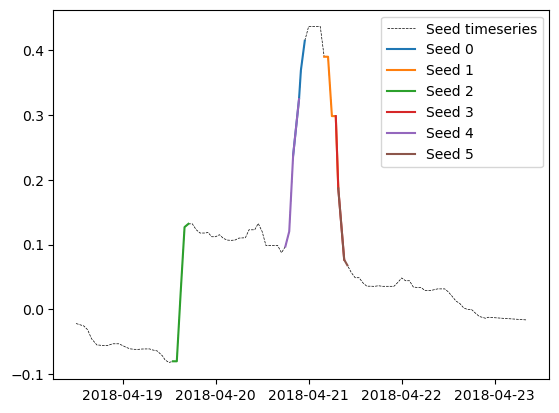

In [16]:
seed_timeseries = analysis.smoothed_distances[cp_idx_sel]
plt.plot(timestamps,seed_timeseries, c='black', linestyle='--', linewidth=0.5, label='Seed timeseries')

for sid, example_seed in enumerate(analysis.seeds):
    seed_end = example_seed.end_epoch
    seed_start = example_seed.start_epoch
    seed_cp_idx = example_seed.index

    plt.plot(timestamps[seed_start:seed_end+1], seed_timeseries[seed_start:seed_end+1], label=f'Seed {sid}')

plt.legend()
plt.show()

Several timespans of surface increase and decrease are detected, but we are only interested in the avalanche-related increase. Other seeds are found in the timespan of poor scan alignment (which we should leave out in our analysis, e.g., by not adding the epochs at all). We can now select the corresponding object to this seed and use a `plot()´ method to visualize the 4D-OBC by its time series (left) and in its spatial extent (right), colored by the time series similarity metric.

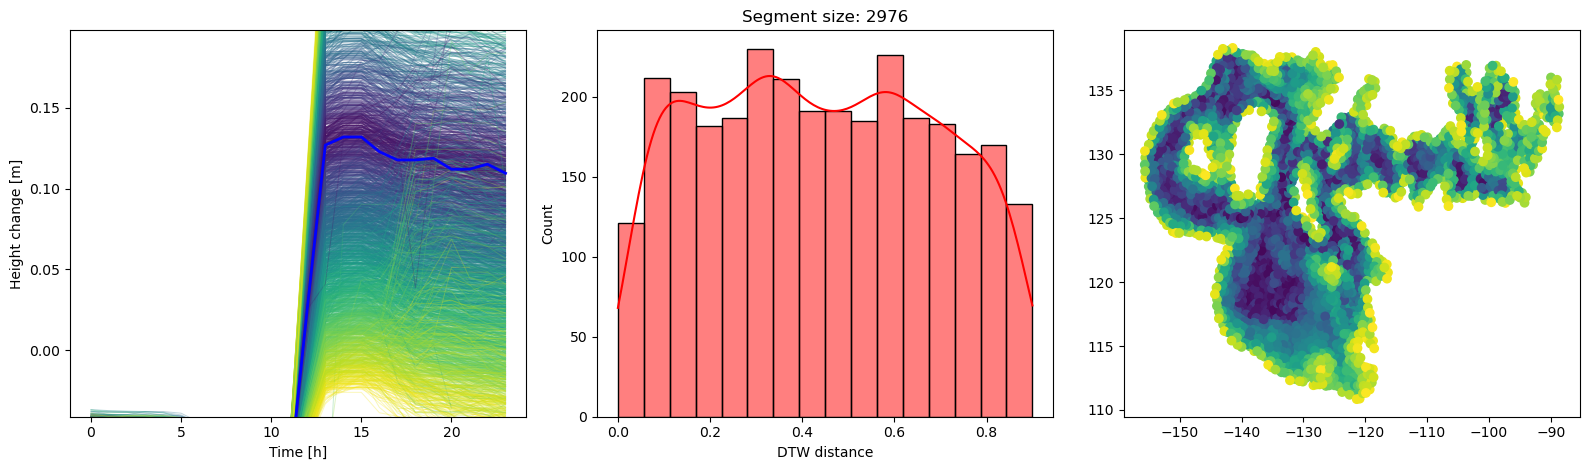

In [17]:
sel_seed_idx = 2
sel_seed = analysis.seeds[sel_seed_idx]
sel_object = analysis.objects[sel_seed_idx]

sel_object.plot()

To better understand the object properties (time series behavior and spatial extent in the scene), we use the object data to visualize the change information:

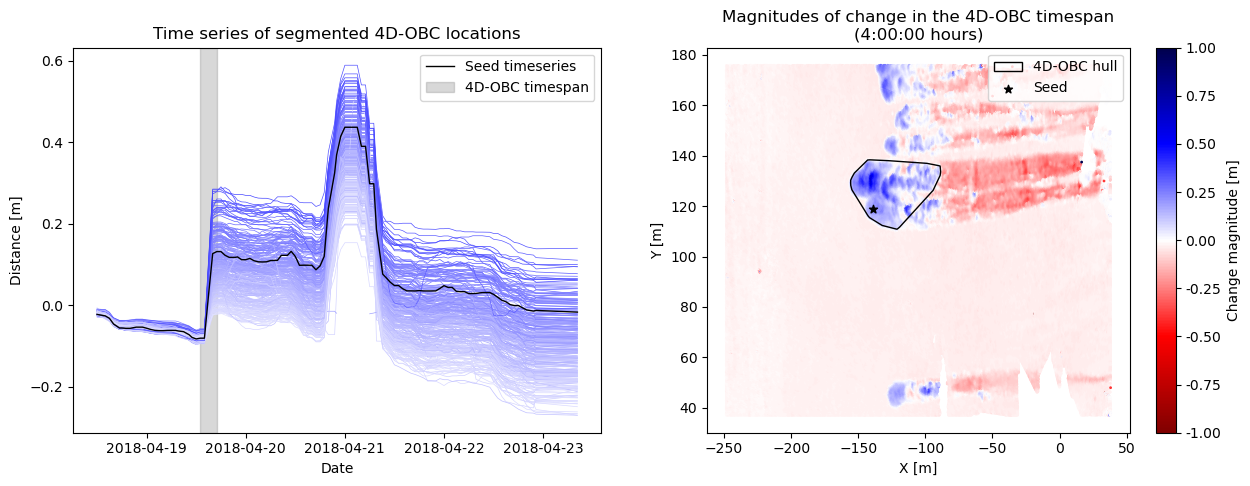

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
ax1,ax2 = axs

# get indices of 4D-OBC
idxs = objects[sel_seed_idx].indices

# get change values at end of object for each location
epoch_of_interest = int(objects[sel_seed_idx].end_epoch)
distances_of_interest = analysis.smoothed_distances[:, epoch_of_interest]

# get the change magnitude between end and start of object for each location
magnitudes_of_interest = analysis.smoothed_distances[:, epoch_of_interest] - analysis.smoothed_distances[:, int(objects[sel_seed_idx].start_epoch)]

# set the colormap according to magnitude at each location in the object
crange = 1.0
import matplotlib.colors as mcolors
cmap = plt.get_cmap('seismic_r').copy()
norm = mcolors.CenteredNorm(halfrange=crange)
cmapvals = norm(magnitudes_of_interest)

# plot the timeseries of the segmented locations (colored by time series similarity)
for idx in idxs[::10]:
    ax1.plot(timestamps, analysis.smoothed_distances[idx], c=cmap(cmapvals[idx]), linewidth=0.5)
# plot the seed time series
ax1.plot(timestamps, analysis.smoothed_distances[cp_idx_sel], c='black', linewidth=1., label='Seed timeseries')

# fill the area of the object
ax1.axvspan(timestamps[objects[sel_seed_idx].start_epoch], timestamps[objects[sel_seed_idx].end_epoch], alpha=0.3, color='grey', label='4D-OBC timespan')

# add legend
ax1.legend()

# get subset of core points incorporated in 4D-OBC
cloud = analysis.corepoints.cloud
subset_cloud = cloud[idxs,:2]

# plot coordinates colored by change values at end magnitude of object
d = ax2.scatter(cloud[:,0], cloud[:,1], c = magnitudes_of_interest, cmap='seismic_r', vmin=-crange, vmax=crange, s=1)
plt.colorbar(d, format=('%.2f'), label='Change magnitude [m]', ax=ax2)

# plot convex hull of 4D-OBC
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
hull = ConvexHull(subset_cloud)
ax2.add_patch(Polygon(subset_cloud[hull.vertices,0:2], label = '4D-OBC hull', fill = False))

# plot seed location of 4D-OBC
ax2.scatter(cloud[cp_idx_sel,0], cloud[cp_idx_sel,1], marker = '*', c = 'black', label = 'Seed')

# add plot elements
ax1.set_title('Time series of segmented 4D-OBC locations')
ax1.set_xlabel('Date')
ax1.set_ylabel('Distance [m]')
ax2.set_title(f'Magnitudes of change in the 4D-OBC timespan\n({timestamps[epoch_of_interest]-timestamps[analysis.objects[sel_seed_idx].start_epoch]} hours)')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.legend(loc='upper right')

plt.show()

As aimed, our extracted 4D-OBC covers the timespan of the avalanche-related increase. The time series and changes in the scene are colored by the magnitude of each segmented location in the selected timespan - derived as the difference of change values at the end epoch and the start epoch of the individual object. By this, even though we use a time series of surface change to a fixed reference (first epoch), we are independent from fixed intervals and purely bitemporal change quantification. For each extracted object, we are considering exactly the time series information of their occurrence, which can be highly variable (and even overlapping) within a scene. The map shows how the time series-based segmentation approach nicely delineates the avalanche deposition area. Apparently, what looks like two neighboring avalanches occurred during exactly the same timespan, and is therefore extracted as one space-time event. A spatial separation of the deposition areas may be achieved by parametrizing the similarity thresholds more strictly - try it out if you are working in the interactive notebook, to get a better feeling of the method's properties.

<a id='self-evaluation-quiz'></a>
## Self-evaluation quiz

You are now at the end of this theme's lesson contents and should have achieved a broad overview and specific methods of time series analysis in 4D point clouds. Use the following quiz questions to assess your learning success:

<form name="quiz" action="" method="post" onsubmit="evaluate_quiz(); return false">
<!--Question 1-->   
<label for="q_01">
What does the term “near-continuous acquisition” describe?
</label><br>
<input type="radio" name="q_01">acquisitions at sub-daily intervals, e.g. hourly temporal resolution<br>
<input type="radio" name="q_01">temporal resolution which represents the surface change behavior<br>
<input type="radio" name="q_01">repetition of acquisition as frequently as the instrument allows<br>
   
<div id="correct_q_01" hidden="">

temporal resolution which represents the surface change behavior
  
</div>

<output id="output_q_01">
</output>

<br><br>  
    
<!--Question 2-->
<label for="q_02">
What is an important aspect how high-frequency observation improves monitoring of events, such as rockfalls?
</label><br>
<input type="radio" name="q_02">coinciding and coalescing rockfalls can be identified as individual events<br>
<input type="radio" name="q_02">changing material properties are captured with each acquisition<br>
<input type="radio" name="q_02">the measurement uncertainty is reduced if the rockfall volume is measured twice<br>

<div id="correct_q_02" hidden="">

coinciding and coalescing rockfalls can be identified as individual events
  
</div>

<output id="output_q_02">
</output>
    
<br><br>   
 
<!--Question 3-->
<label for="q_03">
What is the main property of 4D point clouds used in spatiotemporal filtering approaches (e.g. averaging to reduce noise)?
</label><br>
<input type="radio" name="q_03">acquisition from a fixed position<br>
<input type="radio" name="q_03">high measurement redundancy through high spatial and temporal resolution<br>
<input type="radio" name="q_03">sampling differences between repeated laser scanning acquisitions<br>
    
<div id="correct_q_03" hidden="">

high measurement redundancy through high spatial and temporal resolution
  
</div>

<output id="output_q_03">
</output>
    
<br><br>   

<!--Question 4-->
<label for="q_04">
What is an important temporally variable influence on LiDAR measurements, which is especially pronounced in high-frequency (i.e., sub-daily) acquisitions?
</label><br>
<textarea rows = "5" cols = "50" name = "q_04"></textarea><br>
    
<div id="correct_q_04" hidden="">

atmospheric conditions
  
</div>

<output id="output_q_04">
</output>
    
<br><br>   

<!--Question 5-->     
<label for="q_05">
What is a main limitation of bitemporal change analysis methods to spatially delineate individual surface processes from multitemporal point clouds?
</label><br>
<textarea rows = "5" cols = "50" name = "q_05"></textarea><br>

<div id="correct_q_05" hidden="">

ambiguous change information due to spatial overlap of surface activities
  
</div>

<output id="output_q_05">
</output>
    
<br><br>   

<!--Question 6-->     
<label for="q_06">
Using py4dgeo for change analysis, what are the main components of a SpatiotemporalAnalysis object?
</label><br>
<textarea rows = "5" cols = "50" name = "q_06"></textarea><br>

<div id="correct_q_06" hidden="">

reference epoch, core points, M3C2 algorithm configuration, and epochs with timestamps, distances, and uncertainties (from M3C2 calculation)
  
</div>

<output id="output_q_06">
</output>
    
<br><br>   
 
<!--Question 7--> 
<label for="q_07">
How does the user-defined number of clusters (e.g., with k-mean algorithm) influence the result of time series clustering?
</label><br>
<textarea rows = "5" cols = "50" name = "q_07"></textarea><br>

<div id="correct_q_07" hidden="">

The higher the number of clusters, the more fine-grained the derived change patterns. The choice of cluster number is therefore dependent on the analysis objective and properties of observed scene dynamics.
  
</div>

<output id="output_q_07">
</output>
    
<br><br>   
    
<!--Question 8--> 
<label for="q_08">
In the 4D objects-by-change method, what is typically used as reference epoch for bitemporal change computation?
</label><br>
<input type="radio" name="q_08">the previous epoch for each point cloud in the time series<br>
<input type="radio" name="q_08">a fixed, user-defined interval between epochs for each point cloud in the time series<br>
<input type="radio" name="q_08">the first epoch for each point cloud in the time series<br>

<div id="correct_q_08" hidden="">

the first epoch for each point cloud in the time series
  
</div>

<output id="output_q_08">
</output>
    
<br><br>   

<!--Question 9-->
<label for="q_09">
In the 4D objects-by-change method, what is typically used as reference epoch for bitemporal change computation?
</label><br>
<input type="radio" name="q_09">local area with similar surface behavior during a certain timespan<br>
<input type="radio" name="q_09">groups of time series with similar surface behavior across the scene<br>
<input type="radio" name="q_09">similar change values in a specific epoch derived from user-defined thresholds<br>

<div id="correct_q_09" hidden="">

local area with similar surface behavior during a certain timespan
  
</div>

<output id="output_q_09">
</output>
    
<br><br>   
  
<input type="submit" value="Submit" style="font-size:14pt"><br><br>

<output id="output_overall">
</output>
</form>

<a id='exercise'></a>
## Exercise 

Made it through the quiz? Then you are ready for the exercise - proceed with the next part using the button at the bottom of this page.

<a id='references'></a>
## References

<!-- <a id='key-literature'></a>
### Key literature

<a id='further-articles-and-referenced-literature'></a>
### Further articles and referenced literature -->
* Anders, K., Lindenbergh, R. C., Vos, S. E., Mara, H., de Vries, S., & Höfle, B. (2019). High-Frequency 3D Geomorphic Observation Using Hourly Terrestrial Laser Scanning Data Of A Sandy Beach. ISPRS Ann. Photogramm. Remote Sens. Spatial Inf. Sci., IV-2/W5, pp. 317-324. doi: [10.5194/isprs-annals-IV-2-W5-317-2019](https://doi.org/10.5194/isprs-annals-IV-2-W5-317-2019).
* Anders, K., Winiwarter, L., Lindenbergh, R., Williams, J. G., Vos, S. E., & Höfle, B. (2020). 4D objects-by-change: Spatiotemporal segmentation of geomorphic surface change from LiDAR time series. ISPRS Journal of Photogrammetry and Remote Sensing, 159, pp. 352-363. doi: [10.1016/j.isprsjprs.2019.11.025](https://doi.org/10.1016/j.isprsjprs.2019.11.025).
* Anders, K., Winiwarter, L., Mara, H., Lindenbergh, R., Vos, S. E., & Höfle, B. (2021). Fully automatic spatiotemporal segmentation of 3D LiDAR time series for the extraction of natural surface changes. ISPRS Journal of Photogrammetry and Remote Sensing, 173, pp. 297-308. doi: [10.1016/j.isprsjprs.2021.01.015](https://doi.org/10.1016/j.isprsjprs.2021.01.015).
* Anders, K., Eberlein, S., & Höfle, B. (2022). Hourly Terrestrial Laser Scanning Point Clouds of Snow Cover in the Area of the Schneeferner, Zugspitze, Germany: PANGAEA. https://doi.org/10.1594/PANGAEA.941550.
* Anders, K., Winiwarter, L., & Höfle, B. (2022). Improving Change Analysis From Near-Continuous 3D Time Series by Considering Full Temporal Information. IEEE Geoscience and Remote Sensing Letters, 19, pp. 1-5. doi: [10.1109/LGRS.2022.3148920](https://doi.org/10.1109/LGRS.2022.3148920).
* Blanch, X., (2022).  Developing Advanced Photogrammetric Methods for Automated Rockfall Monitoring. Doctoral dissertation. URL: [http://hdl.handle.net/10803/675397](http://hdl.handle.net/10803/675397).
* Blanch, X., Eltner, A., Guinau, M., & Abellan, A. (2021). Multi-Epoch and Multi-Imagery (MEMI) Photogrammetric Workflow for Enhanced Change Detection Using Time-Lapse Cameras. Remote Sensing, 13 (8), pp. 1460. doi: [10.3390/rs13081460](https://doi.org/10.3390/rs13081460).
* Eitel, J. U. H., Höfle, B., Vierling, L. A., Abellán, A., Asner, G. P., Deems, J. S., Glennie, C. L., Joerg, P. C., LeWinter, A. L., Magney, T. S., Mandlburger, G., Morton, D. C., Müller, J., & Vierling, K. T. (2016). Beyond 3-D: The new spectrum of lidar applications for earth and ecological sciences. Remote Sensing of Environment, 186, pp. 372-392. doi: [10.1016/j.rse.2016.08.018](https://doi.org/10.1016/j.rse.2016.08.018).
* Eltner, A., Kaiser, A., Abellan, A., & Schindewolf, M. (2017). Time lapse structure-from-motion photogrammetry for continuous geomorphic monitoring. Earth Surface Processes and Landforms, 42, pp. 2240-2253. doi: [10.1002/esp.4178](https://doi.org/10.1002/esp.4178).
* Friedli, E., Presl, R., & Wieser, A. (2019). Influence of atmospheric refraction on terrestrial laser scanning at long range. 4th Joint International Symposium on Deformation Monitoring: JISDM, pp. 6.
* Kromer, R., Abellán, A., Hutchinson, D., Lato, M., Edwards, T., & Jaboyedoff, M. (2015). A 4D Filtering and Calibration Technique for Small-Scale Point Cloud Change Detection with a Terrestrial Laser Scanner. Remote Sensing, 7 (10), pp. 13029-13052. doi: [10.3390/rs71013029](https://doi.org/10.3390/rs71013029).
* Kromer, R. A., Abellán, A., Hutchinson, D. J., Lato, M., Chanut, M.-A., Dubois, L., & Jaboyedoff, M. (2017). Automated Terrestrial Laser Scanning with Near Real-Time Change Detection - Monitoring of the Séchillenne Landslide. Earth Surface Dynamics, 5, pp. 293-310. doi: [10.5194/esurf-5-293-2017](https://doi.org/10.5194/esurf-5-293-2017).
* Kuschnerus, M., Lindenbergh, R., & Vos, S. (2021). Coastal change patterns from time series clustering of permanent laser scan data. Earth Surface Dynamics, 9 (1), pp. 89-103. doi: [10.5194/esurf-9-89-2021](https://doi.org/10.5194/esurf-9-89-2021).
* Kuschnerus, M., Schröder, D., & Lindenbergh, R. (2021). Environmental Influences on the Stability of a Permanently Installed Laser Scanner. Int. Arch. Photogramm. Remote Sens. Spatial Inf. Sci., XLIII-B2-2021, pp. 745-752. doi: [10.5194/isprs-archives-XLIII-B2-2021-745-2021](http://dx.doi.org/10.5194/isprs-archives-XLIII-B2-2021-745-2021).
* Lague, D., Brodu, N., & Leroux, J. (2013). Accurate 3D comparison of complex topography with terrestrial laser scanner: Application to the Rangitikei canyon (N-Z). ISPRS Journal of Photogrammetry and Remote Sensing, 82, pp. 10-26. doi: [10.1016/j.isprsjprs.2013.04.009](https://doi.org/10.1016/j.isprsjprs.2013.04.009).
* Ulrich, V., Williams, J. G., Zahs, V., Anders, K., Hecht, S. & Höfle, B. (2021): Measurement of rock glacier surface change over different timescales using terrestrial laser scanning point clouds. Earth Surface Dynamics, 9, pp. 19-28. doi: [10.5194/esurf-9-19-2021](https://doi.org/10.5194/esurf-9-19-2021).
* Voordendag, A., Goger, B., Klug, C., Prinz, R., Rutzinger, M., Sauter, T., & Kaser, G. (2023). Uncertainty assessment of a permanent long-range terrestrial laser scanning system for the quantification of snow dynamics on Hintereisferner (Austria). Frontiers in Earth Science, 11,  doi: [10.3389/feart.2023.1085416](https://doi.org/10.3389/feart.2023.1085416).
* Vos, S., Anders, K., Kuschnerus, M., Lindenberg, R., Höfle, B., Aarnikhof, S. & Vries, S. (2022). A high-resolution 4D terrestrial laser scan dataset of the Kijkduin beach-dune system, The Netherlands.  Scientific Data, 9:191. doi: [10.1038/s41597-022-01291-9](https://doi.org/10.1038/s41597-022-01291-9).
* Williams, J. G., Rosser, N. J., Hardy, R. J., Brain, M. J., & Afana, A. A. (2018). Optimising 4-D surface change detection: an approach for capturing rockfall magnitude–frequency. Earth Surface Dynamics, 6, pp. 101-119. doi: [10.5194/esurf-6-101-2018](https://doi.org/10.5194/esurf-6-101-2018).
* Williams, J. G., Rosser, N. J., Hardy, R. J., & Brain, M. J. (2019). The Importance of Monitoring Interval for Rockfall Magnitude-Frequency Estimation. Journal of Geophysical Research: Earth Surface, 124 (12),  doi: [10.1029/2019jf005225](https://doi.org/10.1029/2019JF005225).
* Winiwarter, L., Anders, K., Schröder, D., & Höfle, B. (2022). Full 4D Change Analysis of Topographic Point Cloud Time Series using Kalman Filtering. Earth Surface Dynamics Discussions, 2022, pp. 1-25. doi: [10.5194/esurf-2021-103](https://doi.org/10.5194/esurf-2021-103).